Enrollment No : 180280116024 <br>
Sub : DAV

<h1><center>Practical 8 </center></h1>

<B>Aim :</B> Plot the visualized data on screen using Gaussian Mixture Models(GMM) <br>
Plot the visualized data on screen using Gaussian Mixture Models(GMM)<br><br>
Task 1: Types of clustering methods<br>
Task 2: Type 1: Expectation minimization (EM) CLUSTERING using Gaussian Mixture Models(GMM)<br>
Task 3: Lets say, Take Burger King data such as Menu List including columns related to the Calories, price, Sugar, Veg, Non-Veg, breakfast, Not breakfast etc. (Minimum 10 columns must be there)<br>
Task 4: create a list named ex: Features (Calories, Sugar)<br>
Task 5: Using Inbuilt function find normalized value (fit_transform())<br>
Task 6: Using Gaussian Mixture function predict the values and store it into a variable named cluster<br>
Task 7: Calculate silhouette score on data among the clusters<br>
    Task 8: Plot the calculated data (Calories, Sugar) using any one visualization techniques.<br>

## Types of Clustering Method

1. Connectivity-based Clustering (Hierarchical clustering)
2. Centroids-based Clustering (Partitioning methods)     
3. Distribution-based Clustering
4. Density-based Clustering (Model-based methods)
5. Fuzzy Clustering
6. Constraint-based (Supervised Clustering)

## GMM

- Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.

##  Expectation-Maximization

- Expectation-Maximization (EM) is a statistical algorithm for finding the right model parameters. We typically use EM when the data has missing values, or in other words, when the data is incomplete.

## Dataset

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score

In [2]:
# load data

Menu = pd.read_csv('menu.csv')

In [3]:
Menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


## create a list named ex: Features (Calories, Sugar)

In [4]:
x = Menu[['Calories','Sugars']]

In [5]:
x.head()

,Calories,Sugars
0,300,3
1,250,3
2,370,2
3,450,2
4,400,2


## find normalized value

In [6]:
# Import LabelEncoder
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(x)

X_train = scaler.transform(x)
X_test = scaler.transform(x)

## Using Gaussian Mixture function predict the values

In [7]:
gmm = GaussianMixture(n_components=2)
gmm.fit(x)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [8]:
#predictions from gmm
Pred = gmm.predict(x)

In [9]:
Menu['cluster'] = Pred

In [10]:
Menu.columns.tolist()

['Category',
 'Item',
 'Serving Size',
 'Calories',
 'Calories from Fat',
 'Total Fat',
 'Total Fat (% Daily Value)',
 'Saturated Fat',
 'Saturated Fat (% Daily Value)',
 'Trans Fat',
 'Cholesterol',
 'Cholesterol (% Daily Value)',
 'Sodium',
 'Sodium (% Daily Value)',
 'Carbohydrates',
 'Carbohydrates (% Daily Value)',
 'Dietary Fiber',
 'Dietary Fiber (% Daily Value)',
 'Sugars',
 'Protein',
 'Vitamin A (% Daily Value)',
 'Vitamin C (% Daily Value)',
 'Calcium (% Daily Value)',
 'Iron (% Daily Value)',
 'cluster']

## Calculate silhouette score

In [11]:
silhouette_score(x, Pred)

0.09136215935243519

## Plot the calculated data (Calories, Sugar) using any one visualization techniques

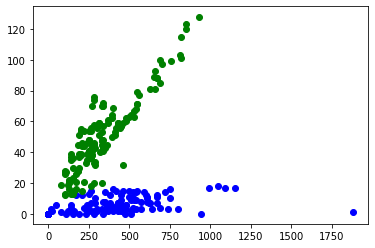

In [12]:
color=['blue','green']
for k in range(0,2):
    data = Menu[Menu["cluster"]==k]
    plt.scatter(data["Calories"],data["Sugars"],c=color[k])
plt.show()